**contents**

1. thresholding
  1. thresholding with numpy
  2. thresholding with opencv
  3. adaptive thresholding
2. image smoothing
  1. average
  2. gaussian
  3. median 
  4. bilateral


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import data, io
import skimage
# control the figure size
plt.rcParams['figure.figsize'] = (8.0, 6.0)  

# image thresholding

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

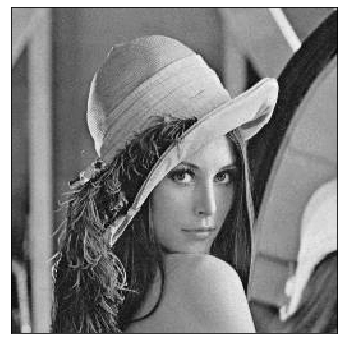

In [8]:
im = cv2.imread('lena.png', 0)
plt.imshow(im,cmap = 'gray')
plt.xticks([]), plt.yticks([])

## thresholding with numpy

Text(0.5, 1.0, 'binary image')

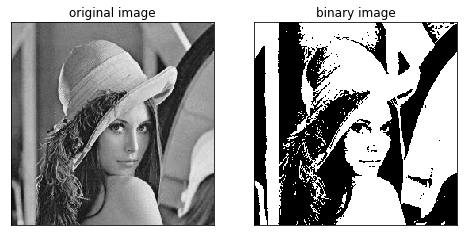

In [9]:
thr=120
imb = im>thr
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.title('original image')
plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(imb,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('binary image')

In [4]:
cv2.threshold??

Docstring:
threshold(src, thresh, maxval, type[, dst]) -> retval, dst
.   @brief Applies a fixed-level threshold to each array element.
.   
.   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
.   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
.   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
.   values. There are several types of thresholding supported by the function. They are determined by
.   type parameter.
.   
.   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
.   above values. In these cases, the function determines the optimal threshold value using the Otsu's
.   or Triangle algorithm and uses it instead of the specified thresh.
.   
.   @note Currently, the Otsu's and Triangle methods are implemented only for 8-bit single-channel images.
.   
.   @param src input array (multiple-cha

## cv2.threshold function in opencv

Text(0.5, 1.0, 'binary image')

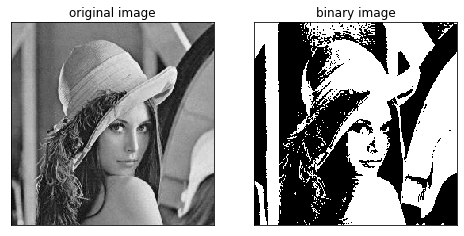

In [10]:
res,imb =cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)


plt.subplot(121)
plt.imshow(im,cmap='gray')
# set the title
plt.title('original image')
# remove the aixs
plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(imb,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('binary image')

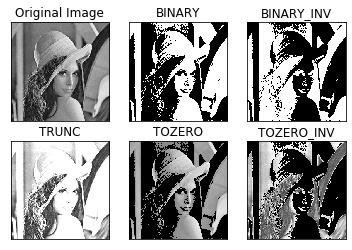

In [6]:
img=im
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

Text(0.5, 1.0, 'binary image')

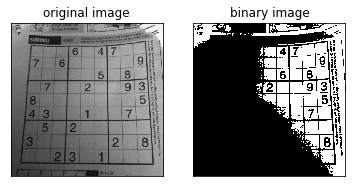

In [8]:
im = cv2.imread('sudo.png',0)
_, imb = cv2.threshold(im, 120, 255, cv2.THRESH_BINARY)

plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.title('original image')
plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(imb,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('binary image')

In [2]:
cv2.adaptiveThreshold??

Docstring:
adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
.   @brief Applies an adaptive threshold to an array.
.   
.   The function transforms a grayscale image to a binary image according to the formulae:
.   -   **THRESH_BINARY**
.       \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
.   -   **THRESH_BINARY_INV**
.       \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
.   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
.   
.   The function can process the image in-place.
.   
.   @param src Source 8-bit single-channel image.
.   @param dst Destination image of the same size and the same type as src.
.   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
.   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
.   The #BORDER_REPLICATE

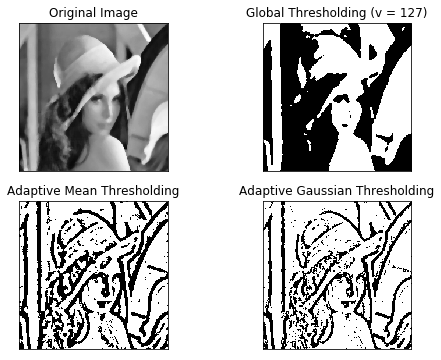

In [11]:

img = cv2.medianBlur(im,7)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.rcParams['figure.figsize'] = (8.0, 6.0) 
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [12]:
cv2.adaptiveThreshold??

Docstring:
adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
.   @brief Applies an adaptive threshold to an array.
.   
.   The function transforms a grayscale image to a binary image according to the formulae:
.   -   **THRESH_BINARY**
.       \f[dst(x,y) =  \fork{\texttt{maxValue}}{if \(src(x,y) > T(x,y)\)}{0}{otherwise}\f]
.   -   **THRESH_BINARY_INV**
.       \f[dst(x,y) =  \fork{0}{if \(src(x,y) > T(x,y)\)}{\texttt{maxValue}}{otherwise}\f]
.   where \f$T(x,y)\f$ is a threshold calculated individually for each pixel (see adaptiveMethod parameter).
.   
.   The function can process the image in-place.
.   
.   @param src Source 8-bit single-channel image.
.   @param dst Destination image of the same size and the same type as src.
.   @param maxValue Non-zero value assigned to the pixels for which the condition is satisfied
.   @param adaptiveMethod Adaptive thresholding algorithm to use, see #AdaptiveThresholdTypes.
.   The #BORDER_REPLICATE

## otsu's method (adaptive thresholding)

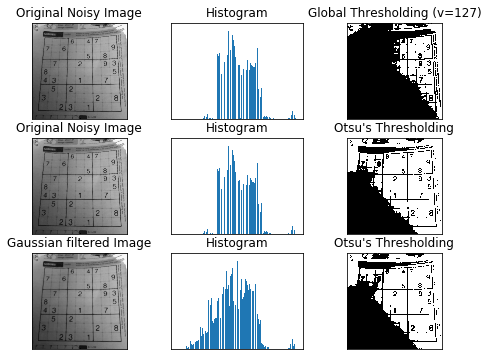

In [18]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# image smooth

## averaging smooth

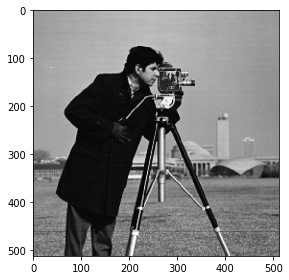

In [10]:
im = data.camera()
io.imshow(im)

Text(0.5, 1.0, 'binary image')

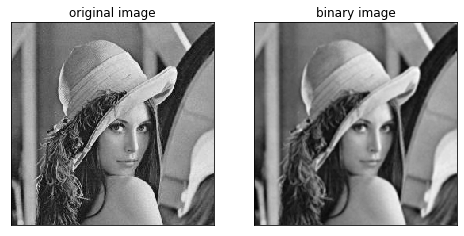

In [12]:
# averaging filter 
imb = cv2.blur(im, (3,3))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.title('original image')
plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(imb,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('binary image')

## gaussian smoothing

Text(0.5, 1.0, 'Gaussian image')

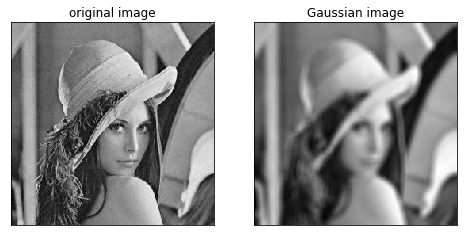

In [18]:
imb = cv2.GaussianBlur(im, (9,9),1000)
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.title('original image')
plt.xticks([]),plt.yticks([])

plt.subplot(122)
plt.imshow(imb,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('Gaussian image')

In [16]:
im.ndim

2

In [19]:
def add_gaussian(image, sigma):
    h,w= image.shape[0:2]
    noise = np.random.randn(h,w)*sigma
#     not change the original image
    cpy_img = np.float32(np.copy(image))
    outImg = np.zeros(cpy_img.shape, np.float32)
    outImg = cpy_img+noise
    return outImg


In [20]:
# add the gaussian noise to image
img = add_gaussian(im, 5)

Text(0.5, 1.0, 'smoothimage')

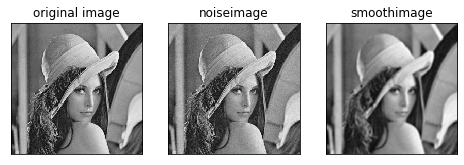

In [22]:
imb = cv2.GaussianBlur(img, (5,5), 2)
plt.subplot(131)
plt.imshow(im,cmap='gray')
plt.title('original image')
plt.xticks([]),plt.yticks([])

plt.subplot(132)
plt.imshow(img,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('noiseimage')

plt.subplot(133)
plt.imshow(imb,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('smoothimage')

add the gaussian noise with skimage package

Text(0.5, 1.0, 'smoothimage')

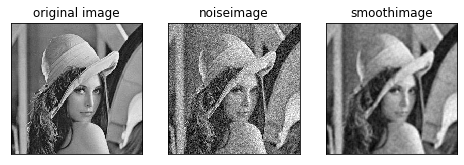

In [24]:
# add gaussian noise to the image 
img=skimage.util.random_noise(im, 'gaussian', seed=0)


imb = cv2.GaussianBlur(img, (5,5), 5)
plt.subplot(131)
plt.imshow(im,cmap='gray')
plt.title('original image')
plt.xticks([]),plt.yticks([])

plt.subplot(132)
plt.imshow(img,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('noiseimage')

plt.subplot(133)
plt.imshow(imb,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('smoothimage')

## median smoothing

Text(0.5, 1.0, 'median Smoothing')

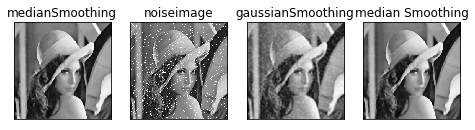

In [27]:
#   add salt noise to the image
ims=skimage.util.random_noise(im, 'salt', seed=5)

# gaussian smoothing
imb = cv2.GaussianBlur(ims, (5,5), 5)

# src must be uint8 type if the size is 3 or 5
imsn=cv2.medianBlur(np.uint8(ims*255),5 )

# show the images
plt.subplot(141)
plt.imshow(imsn,cmap='gray')
plt.title('medianSmoothing')
plt.xticks([]),plt.yticks([])

plt.subplot(142)
plt.imshow(ims,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('noiseimage')

plt.subplot(143)
plt.imshow(imb,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('gaussianSmoothing')

plt.subplot(144)
plt.imshow(imsn,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('median Smoothing')

In [4]:
cv2.medianBlur??

Docstring:
medianBlur(src, ksize[, dst]) -> dst
.   @brief Blurs an image using the median filter.
.   
.   The function smoothes an image using the median filter with the \f$\texttt{ksize} \times
.   \texttt{ksize}\f$ aperture. Each channel of a multi-channel image is processed independently.
.   In-place operation is supported.
.   
.   @note The median filter uses #BORDER_REPLICATE internally to cope with border pixels, see #BorderTypes
.   
.   @param src input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be
.   CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
.   @param dst destination array of the same size and type as src.
.   @param ksize aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...
.   @sa  bilateralFilter, blur, boxFilter, GaussianBlur
Type:      builtin_function_or_method


In [ ]:
ims[:10,:10]

## bilateral smoothing

In [5]:
cv2.bilateralFilter??

Docstring:
bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]]) -> dst
.   @brief Applies the bilateral filter to an image.
.   
.   The function applies bilateral filtering to the input image, as described in
.   http://www.dai.ed.ac.uk/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html
.   bilateralFilter can reduce unwanted noise very well while keeping edges fairly sharp. However, it is
.   very slow compared to most filters.
.   
.   _Sigma values_: For simplicity, you can set the 2 sigma values to be the same. If they are small (\<
.   10), the filter will not have much effect, whereas if they are large (\> 150), they will have a very
.   strong effect, making the image look "cartoonish".
.   
.   _Filter size_: Large filters (d \> 5) are very slow, so it is recommended to use d=5 for real-time
.   applications, and perhaps d=9 for offline applications that need heavy noise filtering.
.   
.   This filter does not work inplace.
.   @param src Source 8-bit or

Text(0.5, 1.0, 'GaussianSmooth')

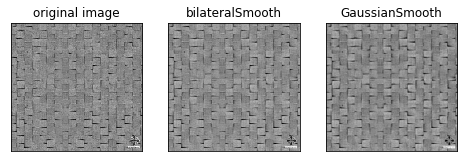

In [28]:
im= cv2.imread('texture.jpg',0)

imb= cv2.bilateralFilter(im, 5, 45, 67)
img = cv2.GaussianBlur(im, (5,5), 4)
# plt.
plt.subplot(131)
plt.imshow(im,cmap='gray')
plt.title('original image')
plt.xticks([]),plt.yticks([])

plt.subplot(132)
plt.imshow(imb,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('bilateralSmooth')
plt.subplot(133)
plt.imshow(img,cmap='gray')

plt.xticks([]),plt.yticks([])
plt.title('GaussianSmooth')